## Q5

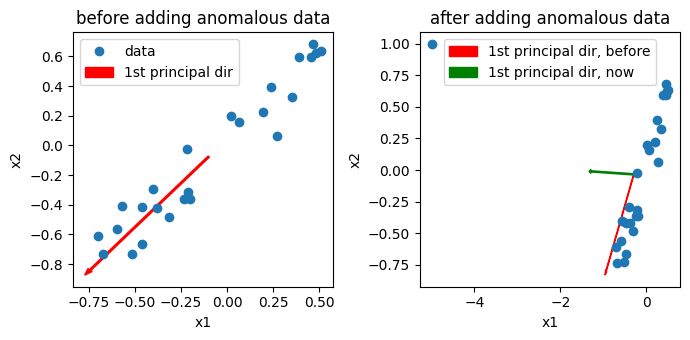

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 


def PCA(X, d):
    '''
    Inputs:
        X: (p, n) p is #features, n is #data points
        d: number of principal components to keep
    Outputs:
        V: (p, d)
        X_reduced: (d, n)
    '''
    X_bar = X - X.mean(axis = 1, keepdims = True)
    U, s, V = np.linalg.svd(X_bar)
    X_reduced = U[:, :d].T @ X_bar
    return U[:, :d], X_reduced, s, V
    
    
# generate 25 points of sample data uniformly distributed in [-1,1]
u = np.random.uniform(-1,1,25).reshape(25,1)
X = np.concatenate([u * np.cos(np.pi/4), u * np.sin(np.pi/4)], axis=1)
X = X + np.random.randn(25,2) * 0.1
plt.figure(figsize=(7, 3.5))

pca_directions1, pca_data, _, _ = PCA(X.T, 1)
plt.subplot(1, 2, 1)
plt.plot(X[:, 0], X[:, 1], 'o', label='data')
plt.arrow(X.mean(axis=0)[0], X.mean(axis=0)[1], pca_directions1[0, 0], pca_directions1[1, 0], width=0.01, color='r', label='1st principal dir')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('before adding anomalous data')
X = np.concatenate([X, np.array([[-5, 1]])], axis=0)
pca_directions2, pca_data, _, _ = PCA(X.T, 1)
plt.subplot(1, 2, 2)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.arrow(X.mean(axis=0)[0], X.mean(axis=0)[1], pca_directions1[0, 0], pca_directions1[1, 0], width=0.01, color='r', label='1st principal dir, before')
plt.arrow(X.mean(axis=0)[0], X.mean(axis=0)[1], pca_directions2[0, 0], pca_directions2[1, 0], width=0.01, color='g', label='1st principal dir, now')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('after adding anomalous data')
plt.tight_layout()
plt.savefig('pca.png')

plt.show()